In [15]:
  #@title
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Data

In [16]:
!pip install wget
import wget


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# the file is stored at book's site
url = 'https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch05/student.csv'
wget.download(url,'data.csv')

'data (1).csv'

# Prepare Data

In [33]:
# Load data into pandas
import pandas as pd
df=pd.read_csv('./data.csv')
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [34]:
## The above syntax is also correct
X = df['GPA']
y = df['SAT']

In [35]:
## Dividing data in train/ test to find accuracy later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model Definition/Training

In [36]:
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=1, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [38]:
# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, callbacks=[early_stopping], verbose=0)

# Predict Unseen Data

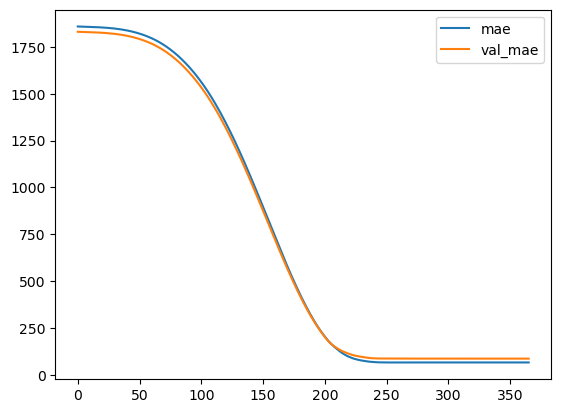

In [39]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [40]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  83.16275787353516
Mean Absolute Error :  13442.17578125


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Measure accuracy using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on the Test Data: {:.2f}".format(mse))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared on the Test Data: {:.2f}".format(r2))

1/1 [==============================] - 0s 142ms/step
Mean Squared Error on the Test Data: 13442.18
R-squared on the Test Data: -0.50
